In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read the data

In [2]:
packets = pd.read_csv('packets_cumulative.txt', sep='\t')

In [3]:
packets.dropna(subset = ["Subtype"], inplace=True)

In [4]:
subtypes = np.array(packets.Subtype.unique().tolist(), int).tolist()
subtypes.sort()
print(subtypes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


In [15]:
packets.describe()

,Channel,Type,Subtype
count,1.244776e+07,1.244776e+07,1.244776e+07
mean,3.805803e+01,8.760676e-01,2.463227e+01
std,3.937176e+01,4.244883e-01,7.785576e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,1.000000e+00,2.500000e+01
50%,3.600000e+01,1.000000e+00,2.700000e+01
75%,4.400000e+01,1.000000e+00,2.800000e+01
max,1.650000e+02,2.000000e+00,4.700000e+01


In [12]:
types = {0  :{'Association Requests':0},
         1  :{'Association Responses':0},
         2  :{'Reassociation Requests':0},
         3  :{'Resssociation Responses':0},
         4  :{'Probe Requests':0},
         5  :{'Probe Responses':0},
         6  :{'Fragmented frame':0},
         7  :{'Unrecognized':0},
         8  :{'Beacons':0},
         9  :{'ATIMs':0},
         10 :{'Disassociations':0},
         11 :{'Authentications':0},
         12 :{'Deauthentications':0},
         13 :{'Actions':0},
         14 :{'Beamforming Action':0},
         15 :{'Aruba Management Packet':0},
         16 :{'Unrecognized':0},
         17 :{'Unrecognized':0},
         19 :{'Unrecognized':0},
         18 :{'Trigger BQRP':0},
         20 :{'Unrecognized':0},
         21 :{'NDP Announcement':0},
         24 :{'Block ACK Requests':0},
         25 :{'Block ACKs':0},
         26 :{'PS-Polls':0},
         27 :{'Ready To Sends':0},
         28 :{'Clear To Sends':0},
         29 :{'ACKs':0},
         30 :{'CF-Ends':0},
         31 :{'CF-Ends/CF-Acks':0},
         32 :{'Data':0},
         33 :{'Data+CF-Ack':0},
         34 :{'Data+CF-Poll':0},
         35 :{'Data+CF-Ack+CF-Poll':0},
         36 :{'Null':0},
         37 :{'CF-Ack':0},
         38 :{'CF-Poll':0},
         39 :{'CF-Ack+CF-Poll':0},
         40 :{'QoS Data':0},
         41 :{'QoS Data+CF-Ack':0},
         42 :{'QoS Data+CF-Poll':0},
         43 :{'QoS Data+CF-Ack+CF-Poll':0},
         44 :{'QoS Null':0},
         45 :{'Unrecognized':0},
         46 :{'QoS CF-Poll':0},
         47 :{'QoS CF-Ack+CF-Poll':0}}

In [13]:
types_new = types

for index, row in packets.iterrows():
    types_new[int(row['Subtype'])][list(types_new[int(row['Subtype'])].keys())[0]] = types_new[int(row['Subtype'])][list(types_new[int(row['Subtype'])].keys())[0]] + 1

In [14]:
types_new

{0: {'Association Requests': 23},
 1: {'Association Responses': 77},
 2: {'Reassociation Requests': 40},
 3: {'Resssociation Responses': 32},
 4: {'Probe Requests': 14541},
 5: {'Probe Responses': 106355},
 6: {'Fragmented frame': 22},
 7: {'Unrecognized': 12},
 8: {'Beacons': 1852421},
 9: {'ATIMs': 7},
 10: {'Disassociations': 25},
 11: {'Authentications': 147},
 12: {'Deauthentications': 71},
 13: {'Actions': 11579},
 14: {'Beamforming Action': 3045},
 15: {'Aruba Management Packet': 21},
 16: {'Unrecognized': 3},
 17: {'Unrecognized': 4},
 19: {'Unrecognized': 9},
 18: {'Trigger BQRP': 1},
 20: {'Unrecognized': 8},
 21: {'NDP Announcement': 110932},
 24: {'Block ACK Requests': 58646},
 25: {'Block ACKs': 1720390},
 26: {'PS-Polls': 3},
 27: {'Ready To Sends': 3274997},
 28: {'Clear To Sends': 2871350},
 29: {'ACKs': 1201354},
 30: {'CF-Ends': 775911},
 31: {'CF-Ends/CF-Acks': 2},
 32: {'Data': 66509},
 33: {'Data+CF-Ack': 132},
 34: {'Data+CF-Poll': 160},
 35: {'Data+CF-Ack+CF-Poll

<AxesSubplot:>

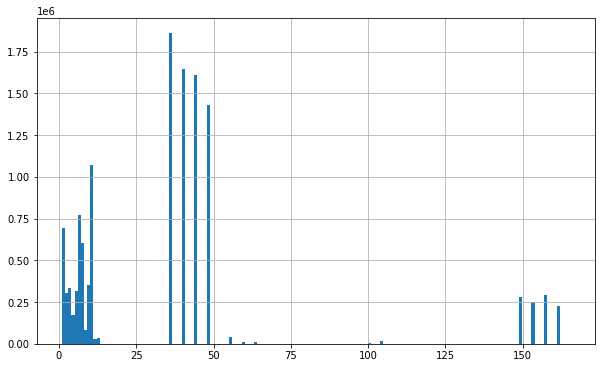

In [22]:
packets.Channel.hist(bins = 161, figsize = (10,6))

In [34]:
f = open('distribution.txt', 'w')

dist = {}

for _, val in types_new.items():
    for key, value in val.items():
        f.write(key + "\t" + str(value) + "\n")

f.close()

In [35]:
channels = np.array(packets.Channel.unique().tolist(), int).tolist()
channels.sort()
print(channels)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 36, 40, 44, 48, 52, 56, 60, 64, 100, 104, 108, 112, 116, 132, 136, 140, 149, 153, 157, 161, 165]


In [38]:
channel_dist = dict.fromkeys(channels, 0)

In [42]:
for index, row in packets.iterrows():
    channel_dist[int(row['Channel'])] = channel_dist[int(row['Channel'])] + 1

In [45]:


f = open('channel.txt', 'w')

dist = {}

for key, value in channel_dist.items():
    f.write(str(key) + "\t" + str(value) + "\n")
    print(str(key) + "\t" + str(value) + "\n")

f.close()

1	276325

2	419347

3	302826

4	335875

5	170260

6	318327

7	784781

8	602388

9	85159

10	351130

11	1087825

12	31504

13	32187

36	1873464

40	1657763

44	1616290

48	1431629

52	1068

56	43287

60	8208

64	8861

100	2986

104	17308

108	18

112	39

116	7

132	199

136	2

140	1

149	281112

153	250368

157	290986

161	226561

165	99

